In [4]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA


In [5]:
zoo = pd.read_csv("Zoo.csv")

In [6]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#EDA

In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


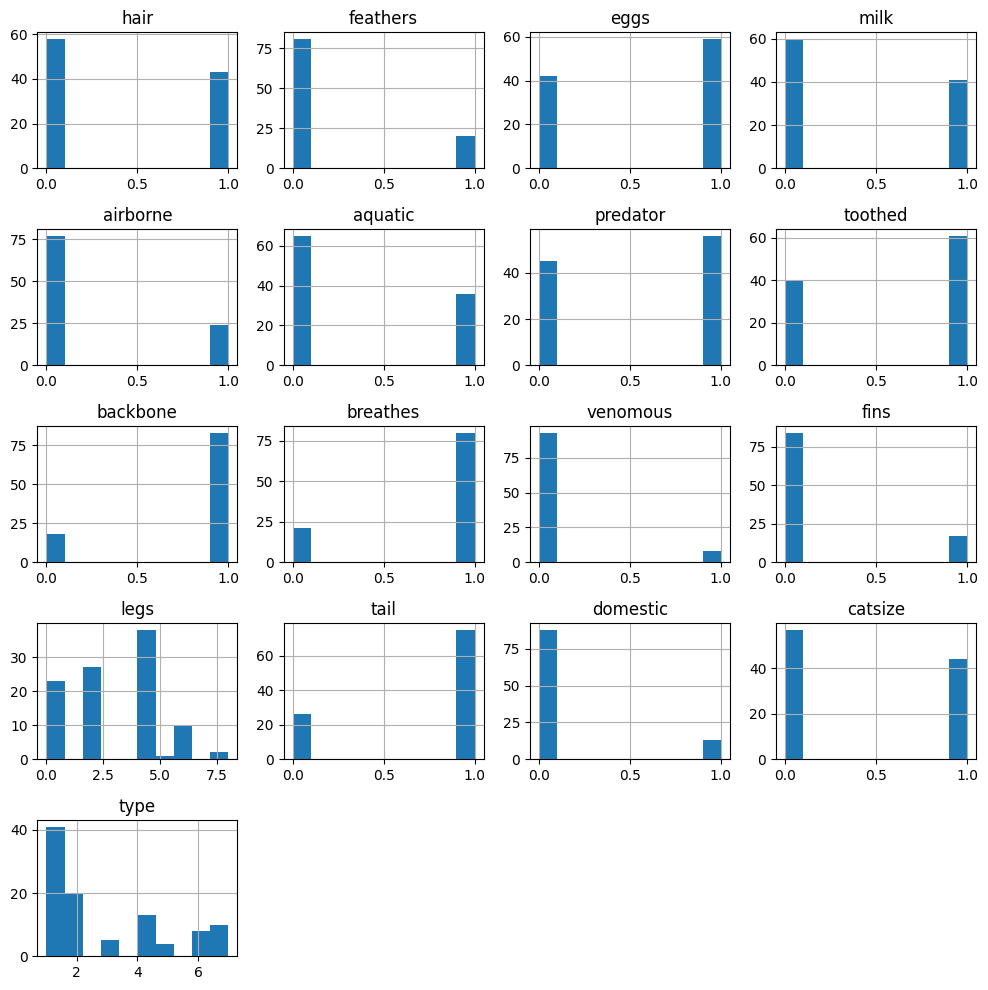

In [8]:
zoo.hist(figsize=(10, 10))
plt.tight_layout()  # To prevent overlapping labels
plt.show()

#Pre-process

In [9]:
x = zoo.drop(['type', 'animal name'], axis=1)
y = zoo['type']
column_names = x.columns

In [10]:
array_x = x.values
array_y = y.values

# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(array_x,array_y, test_size=0.2,random_state=40)

#KNN

In [11]:
num_folds = 10
kfold = KFold(n_splits=10)

In [12]:
model = KNeighborsClassifier(n_neighbors=17) #k-value is 17
results = cross_val_score(model, x_train, y_train, cv=kfold)

In [13]:
print(results.mean())

0.75


#Grid Search for Algorithm Tuning

In [14]:
n_neighbors = numpy.array(range(1,40)) #checking for k values from 1-40
metric = ['euclidean', 'manhattan', 'minkowski']
param_grid = dict(n_neighbors=n_neighbors, metric=metric) #saving accuracies as dictionary format

In [15]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [16]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.9875
{'metric': 'euclidean', 'n_neighbors': 1}


#Visualizing the CV results

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

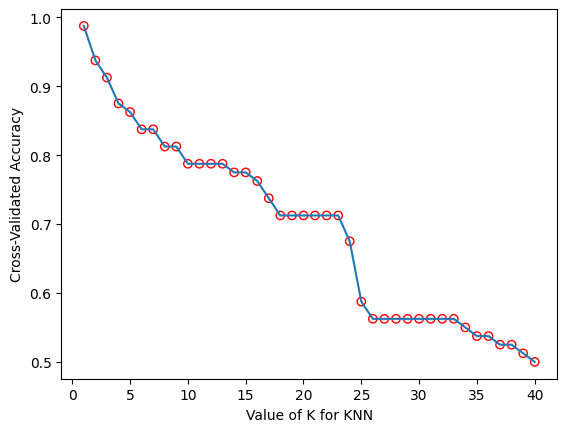

In [20]:
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.scatter(k_range, k_scores, facecolors='none', edgecolors='r')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#Evaluate on test set

In [21]:
#make new model with best parameters
best_knn_model = KNeighborsClassifier(**grid.best_params_)

In [22]:
#training the model
best_knn_model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [23]:
# predicting on test set
y_pred = best_knn_model.predict(x_test)
pd.Series(y_pred).value_counts()

,count
1,10
4,4
2,3
7,2
6,2


In [24]:
pd.crosstab(y_test,y_pred)

col_0,1,2,4,6,7
row_0,,,,,
1,10,0,0,0,0
2,0,3,0,0,0
3,0,0,3,0,0
4,0,0,1,0,0
6,0,0,0,2,0
7,0,0,0,0,2


In [25]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.8571428571428571
Precision: 0.8214285714285714
Recall: 0.8571428571428571
F1-score: 0.8285714285714285


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Visualize the decision boundary

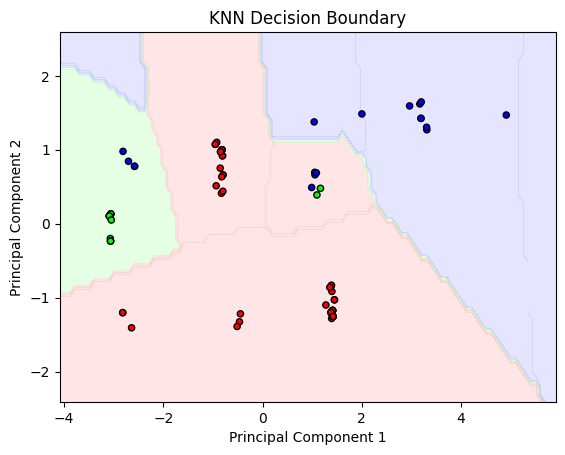

In [26]:
# Create a PCA transformer to reduce the data to 2 dimensions
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, 0.1), numpy.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = best_knn_model.predict(pca.inverse_transform(numpy.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training data
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light) #alpha:transparency, cmap:colormap
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary')
plt.show()

#Interview Questions





> What are the key hyperparameters in KNN?

The key hyperparameters in KNN are:

n_neighbors: The number of nearest neighbors to consider for classification. This is the most important hyperparameter. A small value for n_neighbors can lead to overfitting, while a large value can lead to underfitting.

metric: The distance metric used to calculate the distance between data points. Common choices include 'euclidean', 'manhattan', and 'minkowski'.

weights: How the neighbors' contributions are weighted. 'uniform' gives all neighbors equal weight, while 'distance' gives closer neighbors higher weight.

> What distance metrics can be used in KNN?

Some common distance metrics used in KNN are:

Euclidean Distance: The most common choice, representing the straight-line distance between two points.


Manhattan Distance: Calculates the distance as the sum of absolute differences between the coordinates.


Minkowski Distance: A generalization of Euclidean and Manhattan distances, controlled by a parameter 'p'.

Chebyshev Distance: The maximum absolute difference between the coordinates.

Hamming Distance: Used for categorical data, counting the number of features that differ between two points.

Cosine Similarity: Measures the angle between two vectors, often used for text data.
